In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.transforms as transforms
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.signal.windows as windows
import string

In [2]:
data_SP = pd.read_csv("Rangitoto_SP_Co2_forPlotting.csv")

In [3]:
def conv_mov_avg(input_array, window_len, mode='valid'):
    matrix_of_ones = np.ones(window_len)
    averaged = np.convolve(input_array, matrix_of_ones, mode=mode)/matrix_of_ones.sum()
    return averaged

def gauss_mov_avg(input_array, window_len, mode='valid'):
    matrix_of_gaussian = windows.gaussian(window_len, window_len/5)
    averaged = np.convolve(input_array, matrix_of_gaussian, mode=mode)/matrix_of_gaussian.sum()
    return averaged

In [4]:
data_SP['SP_mov_avg'] = np.nan
window_len = 5 # must be odd number
SP_movAvg = conv_mov_avg(data_SP['SP_mVolts'],window_len)
start_index = int(np.floor(window_len/2))
data_SP.loc[start_index:start_index+len(SP_movAvg)-1,'SP_mov_avg']=SP_movAvg

In [5]:
data_SP['CO2_mov_avg'] = np.nan
window_len = 5 # must be odd number
CO2_movAvg = gauss_mov_avg(data_SP['CO2_gm-2d-1'],window_len)
start_index = int(np.floor(window_len/2))
data_SP.loc[start_index:start_index+len(CO2_movAvg)-1,'CO2_mov_avg']=CO2_movAvg

In [6]:
data_SP.loc[data_SP['DISTANCE']>=6800, 'CO2_gm-2d-1'].max()

34.48381014

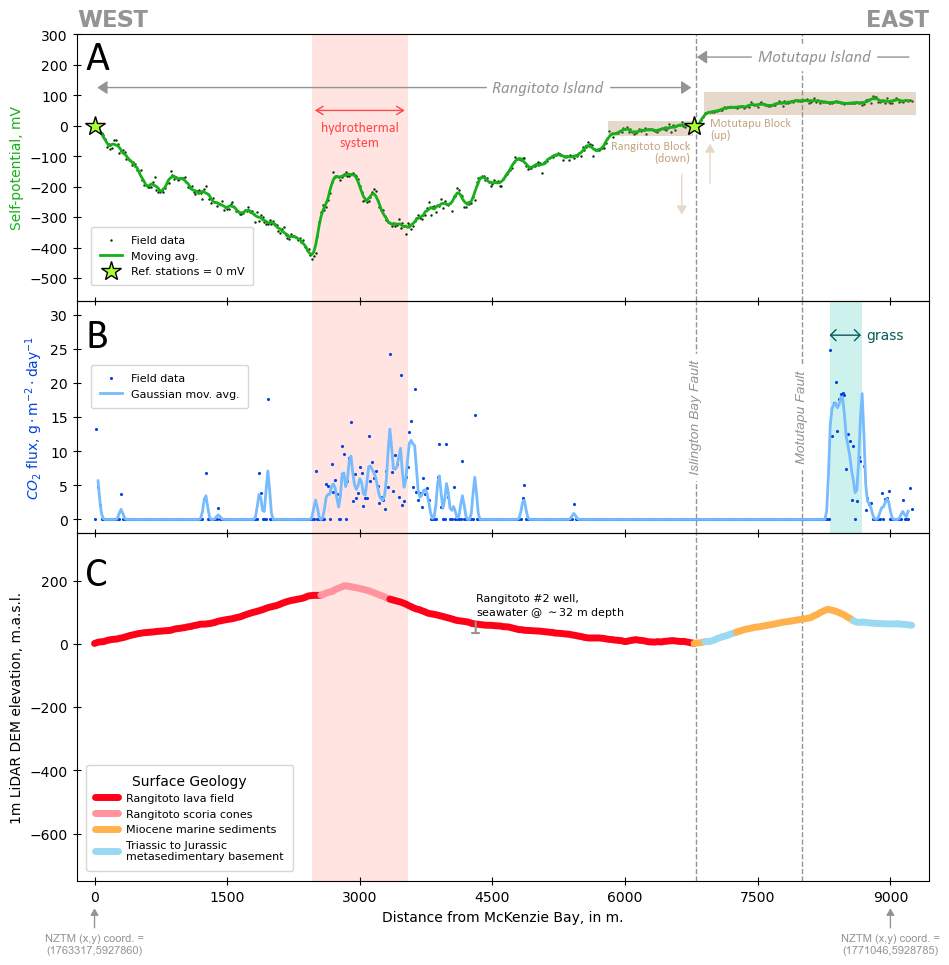

In [7]:
numfig = 3
x_exceedance = 200
hydro_color = 'xkcd:salmon'
islington_x = 6800
motutapuFault_x = 8000
fig, axes = plt.subplots(numfig,1,figsize=(11,11), height_ratios=[2.3,2,3])
fig_labels = string.ascii_uppercase[:numfig]
plt.subplots_adjust(hspace=0)

#SELF POTENTIAL
axes[0].plot(data_SP['DISTANCE'], data_SP['SP_mVolts'],'.',
             color='xkcd:dark green', markersize=1.5, zorder=1, label='Field data')
axes[0].plot(data_SP['DISTANCE'], data_SP['SP_mov_avg'],'-',
             color='xkcd:green', linewidth=2.0, zorder=2, label='Moving avg.')
ref_val_filt = (data_SP['DISTANCE']==0)|(data_SP['DISTANCE']==6780)
axes[0].plot(data_SP.loc[ref_val_filt,'DISTANCE'], data_SP.loc[ref_val_filt,'SP_mVolts'],'*',
             markersize=15, markerfacecolor='xkcd:lime', markeredgecolor='xkcd:black',
             markeredgewidth=1.0, zorder=3, label='Ref. stations = 0 mV')
axes[0].axvline(islington_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[0].axvline(motutapuFault_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[0].axvspan(2460, 3540, facecolor=hydro_color, edgecolor='None', alpha=0.2, zorder=0)
axes[0].legend(bbox_to_anchor=(0.01,0.05,0.25,0.25), fontsize=8, borderpad=0.8)

#ARROWS ETC.
axes[0].annotate('', xy=(6780,125), xytext=(0,125),
                 arrowprops=dict(arrowstyle='<|-|>, head_length=0.6, head_width=0.4',
                                 facecolor='xkcd:grey', edgecolor='xkcd:grey'))
axes[0].text(4500,125,'Rangitoto Island', fontsize=12, fontfamily='Calibri',
             fontstyle='italic', transform=axes[0].transData, color='xkcd:grey',
             verticalalignment='center', backgroundcolor='white')
axes[0].annotate('', xy=(data_SP['DISTANCE'].max(),225), xytext=(6780,225),
                 arrowprops=dict(arrowstyle='<|-, head_length=0.6, head_width=0.4',
                                 facecolor='xkcd:grey', edgecolor='xkcd:grey'))
axes[0].text(7500,225,'Motutapu Island', fontsize=12, fontfamily='Calibri',
             fontstyle='italic', transform=axes[0].transData, color='xkcd:grey',
             verticalalignment='center', backgroundcolor='white')
axes[0].annotate('', xy=(3540,50), xytext=(2460,50),
                 arrowprops=dict(arrowstyle='<->, head_length=0.5, head_width=0.3',
                                 edgecolor='xkcd:light red'))
axes[0].text(3000,15,'hydrothermal\nsystem', fontsize=10, fontfamily='Calibri',
             transform=axes[0].transData, color='xkcd:light red',
             verticalalignment='top', horizontalalignment='center')

#BLOCKS
xmin_motu = 6940/(data_SP['DISTANCE'].max()+x_exceedance)
xmax_motu = (data_SP['DISTANCE'].max()+50)/(data_SP['DISTANCE'].max()+x_exceedance)
axes[0].axhspan(35, 110, xmin=xmin_motu, xmax=xmax_motu, edgecolor='None', facecolor='xkcd:light brown', alpha=0.3)
axes[0].text(6960,-10,'Motutapu Block\n(up)', fontsize=9, fontfamily='Calibri',
             transform=axes[0].transData, color='xkcd:light brown', horizontalalignment='left',
             verticalalignment='center', alpha=0.7)
axes[0].annotate('', xy=(6960,-50), xytext=(6960,-200),
                 arrowprops=dict(arrowstyle='-|>, head_length=0.5, head_width=0.3',
                                 edgecolor='#E5D8C9', facecolor='#E5D8C9', alpha=1.0))

xmin_rangi = 5880/(data_SP['DISTANCE'].max()+x_exceedance)
xmax_rangi = 6820/(data_SP['DISTANCE'].max()+x_exceedance)
axes[0].axhspan(-35, 15, xmin=xmin_rangi, xmax=xmax_rangi, edgecolor='None', facecolor='xkcd:light brown', alpha=0.3)
axes[0].text(6740,-85,'Rangitoto Block\n(down)', fontsize=9, fontfamily='Calibri',
             transform=axes[0].transData, color='xkcd:light brown', horizontalalignment='right',
             verticalalignment='center', alpha=0.7)
axes[0].annotate('', xy=(6640,-300), xytext=(6640,-150),
                 arrowprops=dict(arrowstyle='-|>, head_length=0.5, head_width=0.3',
                                 edgecolor='#E5D8C9', facecolor='#E5D8C9', alpha=1.0))

#ABC
axes[0].text(0.01,0.87,fig_labels[0],fontsize=30,fontfamily='Calibri', transform=axes[0].transAxes)

#CARBON DIOXIDE
axes[1].plot(data_SP['DISTANCE'], data_SP['CO2_gm-2d-1'], '.',
             color='xkcd:blue', markersize=2.5, zorder=1, label='Field data')
axes[1].plot(data_SP['DISTANCE'], data_SP['CO2_mov_avg'], '-',
             color='xkcd:sky blue', linewidth=2.0, zorder=2, label='Gaussian mov. avg.')

#ISLINGTON AND MOTUTAPU FAULTS
axes[1].axvline(islington_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[1].text(islington_x,15,'Islington Bay Fault', fontsize=10, fontfamily='Arial',
             fontstyle='italic', transform=axes[1].transData, color='xkcd:grey',
             verticalalignment='center', horizontalalignment='center', rotation=90,
             rotation_mode='anchor', backgroundcolor='white')
axes[1].axvline(motutapuFault_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[1].text(motutapuFault_x,15,'Motutapu Fault', fontsize=10, fontfamily='Arial',
             fontstyle='italic', transform=axes[1].transData, color='xkcd:grey',
             verticalalignment='center', horizontalalignment='center', rotation=90,
             rotation_mode='anchor', backgroundcolor='white')
axes[1].axvspan(2460, 3540, facecolor=hydro_color, edgecolor='None', alpha=0.2, zorder=0)
axes[1].axvspan(8320, 8680, facecolor='xkcd:turquoise', edgecolor='None', alpha=0.2, zorder=0)
axes[1].legend(bbox_to_anchor=(0.01,0.5,0.25,0.25), fontsize=8, borderpad=0.8)
#ARROW ETC.
axes[1].annotate('grass', xy=(8280,27), xytext=(8730,27),
                 arrowprops=dict(arrowstyle='<->, head_length=0.4, head_width=0.4',
                                 edgecolor='xkcd:dark turquoise'),
                 horizontalalignment='left', verticalalignment='center', color='xkcd:dark turquoise')
#ABC
axes[1].text(0.01,0.8,fig_labels[1],fontsize=30,fontfamily='Calibri', transform=axes[1].transAxes)

#GEOLOGY
lava_field_flt_west = data_SP['DISTANCE']<=2560
lava_field_flt_east = (data_SP['DISTANCE']>=3340)&(data_SP['DISTANCE']<=6780)
scoria_flt = (data_SP['DISTANCE']>=2560)&(data_SP['DISTANCE']<=3340)
waitemata_flt_west = (data_SP['DISTANCE']>=6780)&(data_SP['DISTANCE']<=6900)
waitemata_flt_east = (data_SP['DISTANCE']>=7260)&(data_SP['DISTANCE']<=8580)
tjw_flt_west = (data_SP['DISTANCE']>=6900)&(data_SP['DISTANCE']<=7260)
tjw_flt_east = data_SP['DISTANCE']>=8580
lw_geology = 5
axes[2].plot(data_SP.loc[lava_field_flt_west,'DISTANCE'], data_SP.loc[lava_field_flt_west,'LiDAR_z'],
             color='#ff0019', linewidth=lw_geology, solid_capstyle='round', label='Rangitoto lava field')
axes[2].plot(data_SP.loc[scoria_flt,'DISTANCE'], data_SP.loc[scoria_flt,'LiDAR_z'],
             color='#ff939e', linewidth=lw_geology, solid_capstyle='round', label='Rangitoto scoria cones')
axes[2].plot(data_SP.loc[lava_field_flt_east,'DISTANCE'], data_SP.loc[lava_field_flt_east,'LiDAR_z'],
             color='#ff0019', linewidth=lw_geology, solid_capstyle='round')
axes[2].plot(data_SP.loc[waitemata_flt_west,'DISTANCE'], data_SP.loc[waitemata_flt_west,'LiDAR_z'],
             color='#ffb24c', linewidth=lw_geology, solid_capstyle='round', label='Miocene marine sediments')
axes[2].plot(data_SP.loc[tjw_flt_west,'DISTANCE'], data_SP.loc[tjw_flt_west,'LiDAR_z'],
             color='#99d9f2', linewidth=lw_geology, solid_capstyle='round', label='Triassic to Jurassic\nmetasedimentary basement')
axes[2].plot(data_SP.loc[waitemata_flt_east,'DISTANCE'], data_SP.loc[waitemata_flt_east,'LiDAR_z'],
             color='#ffb24c', linewidth=lw_geology, solid_capstyle='round')
axes[2].plot(data_SP.loc[tjw_flt_east,'DISTANCE'], data_SP.loc[tjw_flt_east,'LiDAR_z'],
             color='#99d9f2', linewidth=lw_geology, solid_capstyle='round')
axes[2].axvline(islington_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[2].axvline(motutapuFault_x, color='xkcd:grey', linestyle='--', linewidth=1.0, zorder=0)
axes[2].axvspan(2460, 3540, facecolor=hydro_color, edgecolor='None', alpha=0.2, zorder=0)
axes[2].legend(bbox_to_anchor=(0.01,0.05,0.25,0.3), fontsize=8, borderpad=0.8, title='Surface Geology')
well_x_proj = 4310
well_surf_z = 62.25
well_depth_z = 37.45
swater_depth = 31.75
#axes[2].plot([4310],[well_surf_z-swater_depth+10], marker="_", color='xkcd:sky blue',markersize=7,linewidth=3)
#see https://stackoverflow.com/questions/75484393/how-to-set-xytext-as-starting-point-for-annotate-arrow-using-matplotlib
#bbox https://stackoverflow.com/questions/23344891/set-pad-between-arrow-and-text-in-annotate-function
axes[2].annotate('Rangitoto #2 well,\nseawater @ $\sim32$ m depth', (well_x_proj, well_surf_z-well_depth_z), xytext=(well_x_proj, well_surf_z+15),
                 horizontalalignment='left', verticalalignment='bottom', fontsize=8,
                 arrowprops=dict(arrowstyle='|-|, widthA=0.0, angleA=0, widthB=0.3', linewidth=1.5,
                                 edgecolor='xkcd:grey', facecolor='xkcd:grey', relpos=(0,0)),
                 bbox=dict(pad=0, facecolor="none", edgecolor="none"))
#ABC
axes[2].text(0.01,0.85,fig_labels[2],fontsize=30,fontfamily='Calibri', transform=axes[2].transAxes)

#AXES SETTING AND SHIT
axes[2].set_xticks(list(range(0,int(1000*np.ceil(data_SP['DISTANCE'].max()/1000)),1500)))
axes[2].set_xlim(data_SP['DISTANCE'].min()-x_exceedance,data_SP['DISTANCE'].max()+x_exceedance)
axes[2].set_ylim(-750,350)
axes[2].set_ylabel('1m LiDAR DEM elevation, m.a.s.l.', color='xkcd:black')
axes[2].set_xlabel('Distance from McKenzie Bay, in m.', color='xkcd:black')
axes[2].set_facecolor('None')
axes[2].tick_params(length=6, direction='inout')
blend_trans_ax2 = transforms.blended_transform_factory(axes[2].transData, axes[2].transAxes)
axes[2].annotate('NZTM (x,y) coord. =\n(1763317,5927860)', (0,-0.07), xytext=(0,-0.15),
                 textcoords=blend_trans_ax2, xycoords=blend_trans_ax2, color='xkcd:grey',
                 horizontalalignment='center', verticalalignment='top', fontsize=8, fontfamily='Arial',
                 arrowprops=dict(arrowstyle='-|>, head_length=0.5, head_width=0.3',
                                 edgecolor='xkcd:grey', facecolor='xkcd:grey'))
axes[2].annotate('NZTM (x,y) coord. =\n(1771046,5928785)', (9000,-0.07), xytext=(9000,-0.15),
                 textcoords=blend_trans_ax2, xycoords=blend_trans_ax2, color='xkcd:grey',
                 horizontalalignment='center', verticalalignment='top', fontsize=8, fontfamily='Arial',
                 arrowprops=dict(arrowstyle='-|>, head_length=0.5, head_width=0.3',
                                 edgecolor='xkcd:grey', facecolor='xkcd:grey'))
axes[0].sharex(axes[2])
axes[0].set_ylim(-575,300)
axes[0].set_facecolor('None')
axes[0].tick_params(length=6, direction='inout')
axes[0].set_ylabel('Self-potential, mV', color='xkcd:green')
axes[0].text(0, 1.03, 'WEST', transform=axes[0].transAxes, horizontalalignment='left',
             fontsize=16, fontweight='bold', fontfamily='Verdana', color='xkcd:grey')
axes[0].text(1.0, 1.03, 'EAST', transform=axes[0].transAxes, horizontalalignment='right',
             fontsize=16, fontweight='bold', fontfamily='Verdana', color='xkcd:grey')
plt.setp(axes[0].get_xticklabels(), visible=False)
axes[1].sharex(axes[2])
axes[1].set_ylim(-2,32)
axes[1].set_facecolor('None')
axes[1].tick_params(length=6, direction='inout')
axes[1].set_ylabel(r'$CO_2$ flux, $\mathrm{g\cdot m^{-2}\cdot day^{-1}}$', color='xkcd:blue')
plt.setp(axes[1].get_xticklabels(), visible=False)

plt.savefig('SP_CO2_plots.pdf', dpi=120)